In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('faltas_treinamento_limpo.xlsx')
print(df)

                Nome Departamento  Turno  Faltas Dia_da_Semana_Ultima_Falta  \
0    Colaborador_001    Operações  Manhã      14                     Quarta   
1    Colaborador_002    Operações  Manhã       1                    Segunda   
2    Colaborador_003       Vendas  Manhã       3                    Segunda   
3    Colaborador_004    Marketing  Manha       3                    Segunda   
4    Colaborador_005           RH  Manha       1                     Quarta   
..               ...          ...    ...     ...                        ...   
214  Colaborador_215    Operações  Tarde       3                    Segunda   
215  Colaborador_216    Operações  Manha       1                    Segunda   
216  Colaborador_217   Financeiro  Tarde       2                    Segunda   
217  Colaborador_218           RH  Tarde       1                      Terça   
218  Colaborador_219   Financeiro  Manhã       0                      Sexta   

    Data_Ultima_Falta Evadiu  Faltas_Suspeitas  
0 

In [3]:
# Exercício 4 – Análise Descritiva Avançada
# a) Qual o número total de evasões por departamento?

evasoes_por_dep = df[df['Evadiu'] == 'Sim']
contagem_evasoes = evasoes_por_dep['Departamento'].value_counts()

print(contagem_evasoes)


Departamento
Marketing     6
Operações     4
Financeiro    4
Vendas        3
RH            3
TI            1
Name: count, dtype: int64


In [4]:
# Exercício 4 – Análise Descritiva Avançada
# b) Qual é o percentual de evasão considerando apenas os que participaram do turno da tarde?

turno_tarde = df[df['Turno'] == 'Tarde']
evasoes_tarde = turno_tarde[turno_tarde['Evadiu'] == 'Sim']
percentual = (len(evasoes_tarde) / len(turno_tarde)) * 100

print(f"Turno da Tarde: {percentual:.2f}%")


Turno da Tarde: 8.85%


In [5]:
# Exercício 4 – Análise Descritiva Avançada
# c) Qual é o desvio padrão de faltas por turno?

faltas_desvio = df.groupby('Turno')['Faltas'].std().round(3)
print(faltas_desvio)


Turno
Manha    2.455
Manhã    2.983
Tarde    2.394
Name: Faltas, dtype: float64


In [6]:
# Exercício 5 – Análise Temporal
# a) Em qual mês ocorreu o maior número de faltas?


df['Data_Ultima_Falta'] = pd.to_datetime(df['Data_Ultima_Falta'])
df['ano_mes'] = df['Data_Ultima_Falta'].dt.to_period('M').astype(str)
num_faltas = df.groupby('ano_mes')['Faltas'].sum().reset_index()

print(num_faltas)


   ano_mes  Faltas
0  2024-01     193
1  2024-02     140
2  2024-03     189


In [7]:
# Exercício 5 – Análise Temporal
# b) Crie uma coluna Semana_Ultima_Falta e descubra qual semana teve maior concentração de
# ausências.


df['Semana_Ultima_Falta'] = df['Data_Ultima_Falta'].dt.isocalendar().week
semana_mais_faltas = df.groupby('Semana_Ultima_Falta')['Faltas'].sum().idxmax()
print(df['Semana_Ultima_Falta'])


0       3
1      12
2      10
3       3
4       7
       ..
214     6
215    13
216     4
217     6
218     7
Name: Semana_Ultima_Falta, Length: 219, dtype: UInt32


In [8]:
# Exercício 5 – Análise Temporal
# c) Faça uma análise cruzando dia da semana e quantidade de evasões.

evasoes = df[df['Evadiu'] == 'Sim']
evasoes_por_dia = evasoes['Dia_da_Semana_Ultima_Falta'].value_counts()

print(evasoes_por_dia)


Dia_da_Semana_Ultima_Falta
Quarta     7
Terça      4
Segunda    4
Sexta      3
Quinta     3
Name: count, dtype: int64


In [9]:
# Exercício 6 – Análise de Risco
# a) Crie a coluna Risco_Evasao com três categorias: &quot;Alto&quot;, &quot;Moderado&quot;, &quot;Baixo&quot;.

faixas = [0, 3, 7, float('inf')]
categorias = ['Baixo', 'Moderado', 'Alto']
df['Risco_Evasao'] = pd.cut(df['Faltas'], bins=faixas, labels=categorias, right=True)
print(df[['Faltas', 'Risco_Evasao']].head())


   Faltas Risco_Evasao
0      14         Alto
1       1        Baixo
2       3        Baixo
3       3        Baixo
4       1        Baixo


In [10]:
# Exercício 6 – Análise de Risco
# b) Gere uma tabela com a distribuição percentual de risco por departamento.

tabela_percentual = pd.crosstab(df['Departamento'], df['Risco_Evasao'], normalize='index') * 100

tabela_percentual = tabela_percentual.round(2)

print(tabela_percentual)


Risco_Evasao  Baixo  Moderado  Alto
Departamento                       
Financeiro    70.37     22.22  7.41
Marketing     76.32     15.79  7.89
Operações     78.26     15.22  6.52
RH            84.62     11.54  3.85
TI            71.43     23.81  4.76
Vendas        72.00     24.00  4.00


In [11]:
# Exercício 6 – Análise de Risco
# c) Há relação entre risco alto e turno da tarde?

relacao_risco_turno = pd.crosstab(df['Turno'], df['Risco_Evasao'])
print(relacao_risco_turno)



Risco_Evasao  Baixo  Moderado  Alto
Turno                              
Manha            44         5     3
Manhã            29         8     3
Tarde            66        20     5


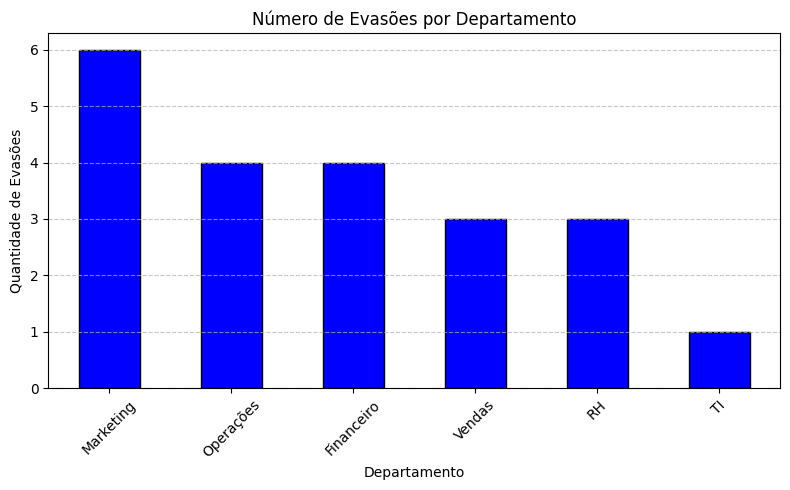

In [12]:
# Exercício 7 – Visualizações Estratégicas
# a) Gráfico de barras: número de faltas por departamento.

evasoes_por_dep = df[df['Evadiu'] == 'Sim']
contagem_evasoes = evasoes_por_dep['Departamento'].value_counts()

plt.figure(figsize=(8, 5))
contagem_evasoes.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Número de Evasões por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Quantidade de Evasões')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



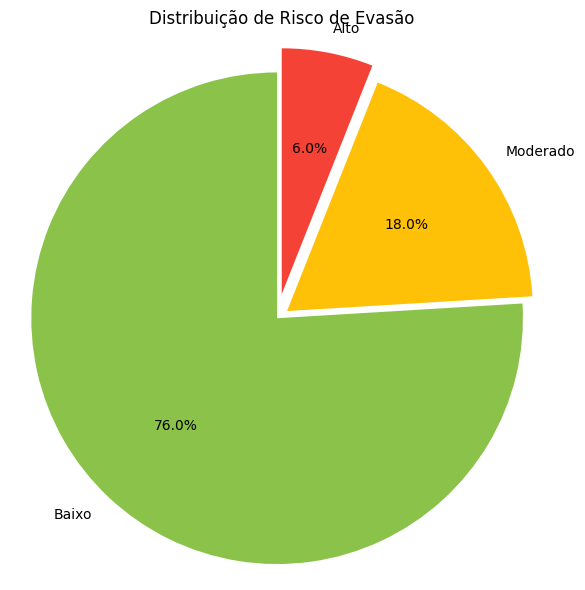

In [15]:
# Exercício 7 – Visualizações Estratégicas
# b) Gráfico de pizza: distribuição de risco de evasão.

distribuicao_risco = df['Risco_Evasao'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(distribuicao_risco, labels=distribuicao_risco.index, autopct='%1.1f%%', 
        startangle=90, colors=['#8BC34A', '#FFC107', '#F44336'], explode=(0, 0.05, 0.1))
plt.title('Distribuição de Risco de Evasão')
plt.axis('equal') 
plt.tight_layout()
plt.show()



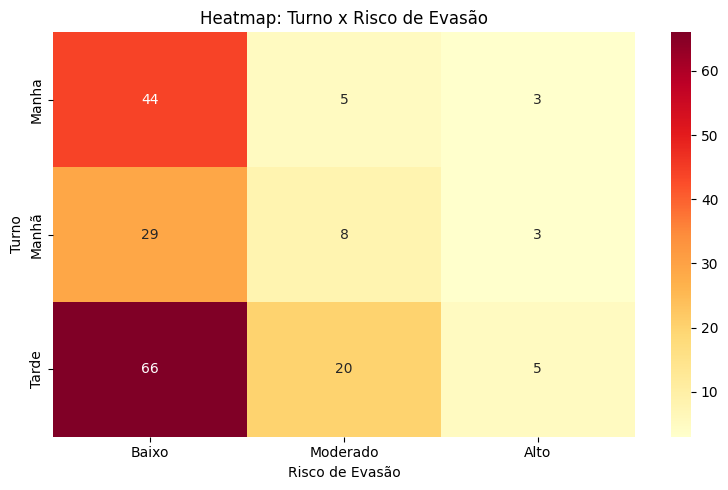

In [18]:
# Exercício 7 – Visualizações Estratégicas
# c) Heatmap cruzando Turno e Risco_Evasao.

tabela_cruzada = pd.crosstab(df['Turno'], df['Risco_Evasao'])

plt.figure(figsize=(8, 5))
sns.heatmap(tabela_cruzada, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap: Turno x Risco de Evasão')
plt.xlabel('Risco de Evasão')
plt.ylabel('Turno')
plt.tight_layout()
plt.show()
